# Analise da serie temporal 03
## Cotacao do Fundo de Investimento de Acoes

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

# imports de modulos que estao definidos dentro do projeto
import arima
import timeseries

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_original = pd.read_csv('../data/fundo02-cotas-acoes.csv', header=0, encoding='iso-8859-1')

#arima.print_dataframe_info(df_original)

## Obtendo a serie temporal DIARIA

In [3]:
# axis=1 diz que estou removendo colunas
df_daily = df_original.drop('Código', axis=1)
df_daily = df_daily.drop('Fundo', axis=1)
df_daily = df_daily.drop('Variação', axis=1)
df_daily = df_daily.drop('Captação', axis=1)
df_daily = df_daily.drop('Resgate', axis=1)
df_daily = df_daily.drop('PL', axis=1)
df_daily = df_daily.drop('Cotistas', axis=1)

#arima.print_dataframe_info(df_daily)

In [4]:
df_daily['Data'] = pd.to_datetime(df_daily['Data'], format='%d/%m/%Y')
df_daily.index = df_daily['Data']
del df_daily['Data']

#arima.print_dataframe_info(df_daily)

In [5]:
df_daily['Cota'] = df_daily['Cota'].apply(lambda x: float(x.replace(',', '.')))
df_daily['Cota'] = df_daily['Cota'].astype(float)

#arima.print_dataframe_info(df_daily)

In [6]:
# esse comando preenche as datas que estao faltando
df_daily = df_daily.resample('D').ffill()

#arima.print_dataframe_info(df_daily)

In [7]:
# existe alguma data com valor NAN?
timeseries.df_has_any_null(df_daily)

[SUCESSO] Todos os valores estao definidos no dataframe


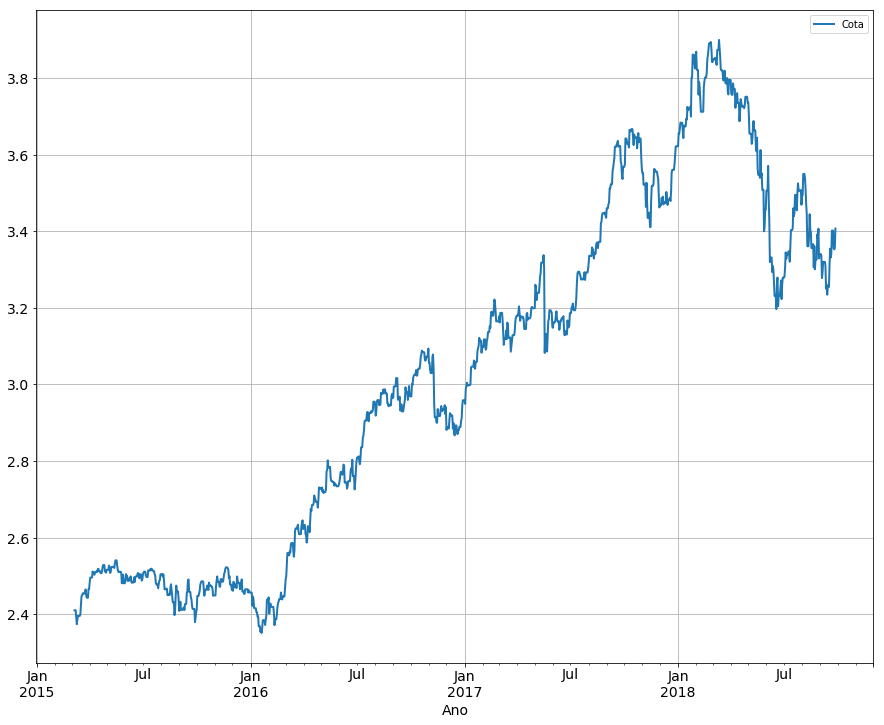

In [8]:
timeseries.plot_timeserie(df_daily)

In [9]:
# estou trabalhando com dados de 3 anos
df_daily = df_daily['2015-09-27':]

#arima.print_dataframe_info(df_daily)

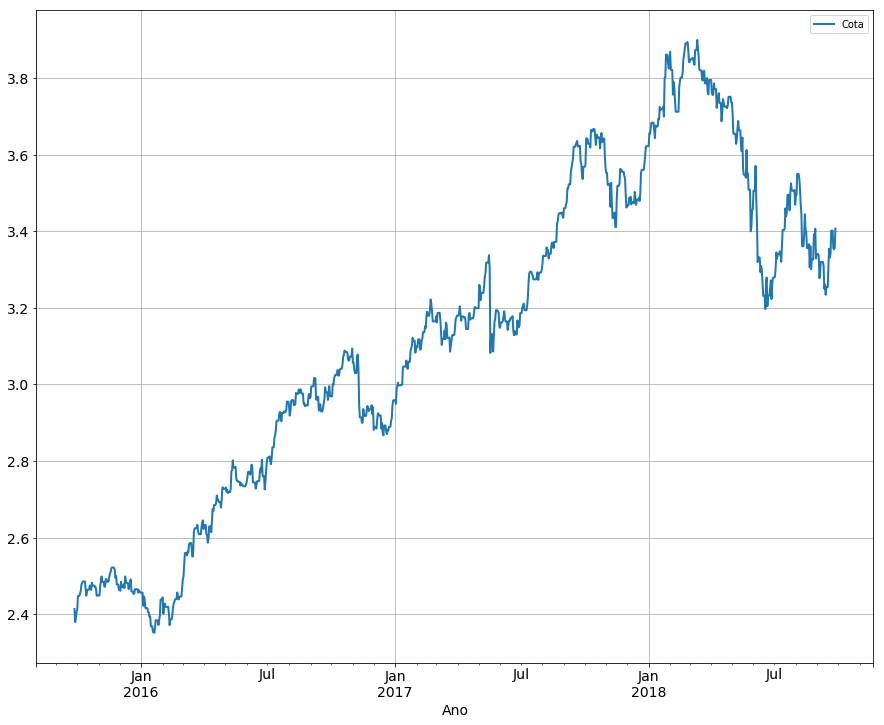

In [10]:
timeseries.plot_timeserie(df_daily)

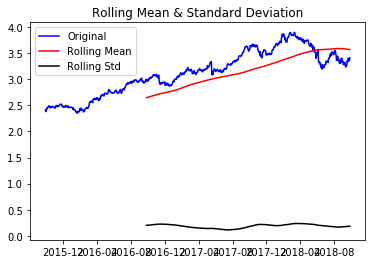

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.458748) > Critical Value 1 (-3.436453)
[FALHA] Test Statistic (-1.458748) > Critical Value 5 (-2.864235)
[FALHA] Test Statistic (-1.458748) > Critical Value 10 (-2.568205)
[FALHA] p-value (0.553810) > 0.05


In [11]:
timeseries.check_stationarity(df_daily, window=365)

## Obtendo a serie temporal do dia 15 e do fim de cada mes

In [12]:
# transforma numa serie temporal com o dia 15 e o fim de cada mes
# todo mes vou ter duas amostras
df_monthly2 = df_daily.resample('SM')
df_monthly2 = df_monthly2.mean()

#arima.print_dataframe_info(df_monthly2)

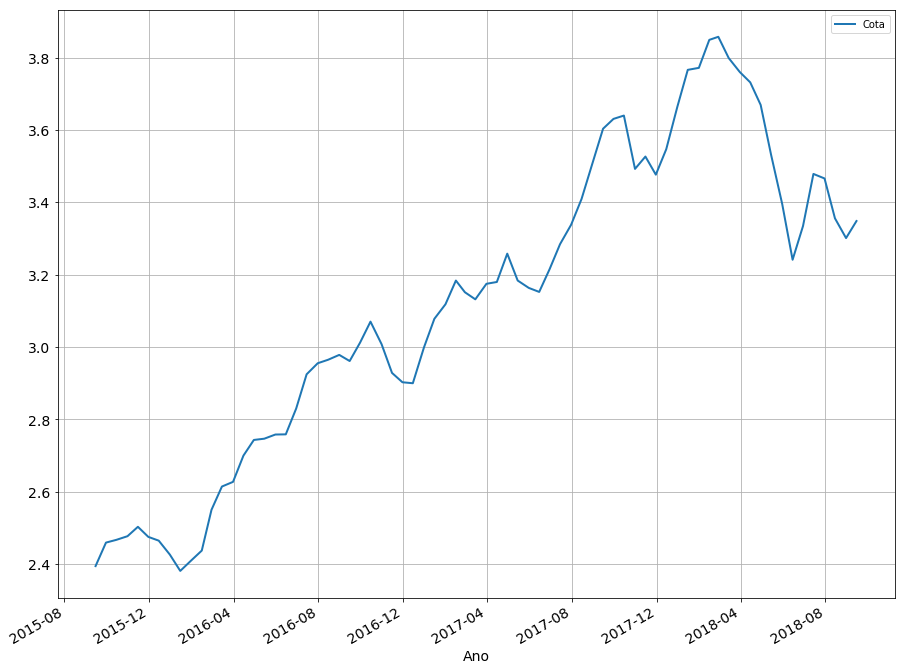

In [13]:
timeseries.plot_timeserie(df_monthly2)

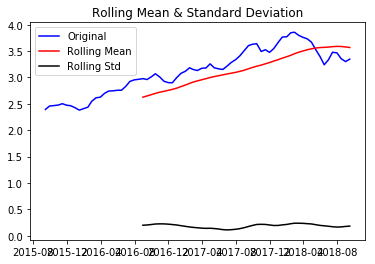

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.487085) > Critical Value 1 (-3.526005)
[FALHA] Test Statistic (-1.487085) > Critical Value 5 (-2.903200)
[FALHA] Test Statistic (-1.487085) > Critical Value 10 (-2.588995)
[FALHA] p-value (0.539890) > 0.05


In [14]:
timeseries.check_stationarity(df_monthly2, window=24)

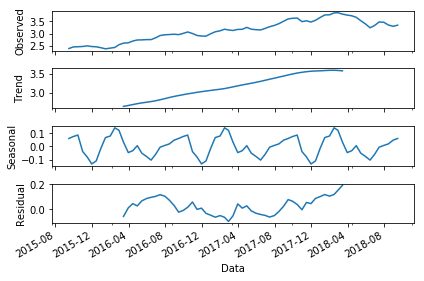

In [15]:
result = seasonal_decompose(df_monthly2, model='additive', freq=24)
result.plot()
plt.show()

## Obtendo a serie temporal MENSAL

In [16]:
df_monthly = df_daily.resample('M')
df_monthly = df_monthly.mean()

#arima.print_dataframe_info(df_monthly)

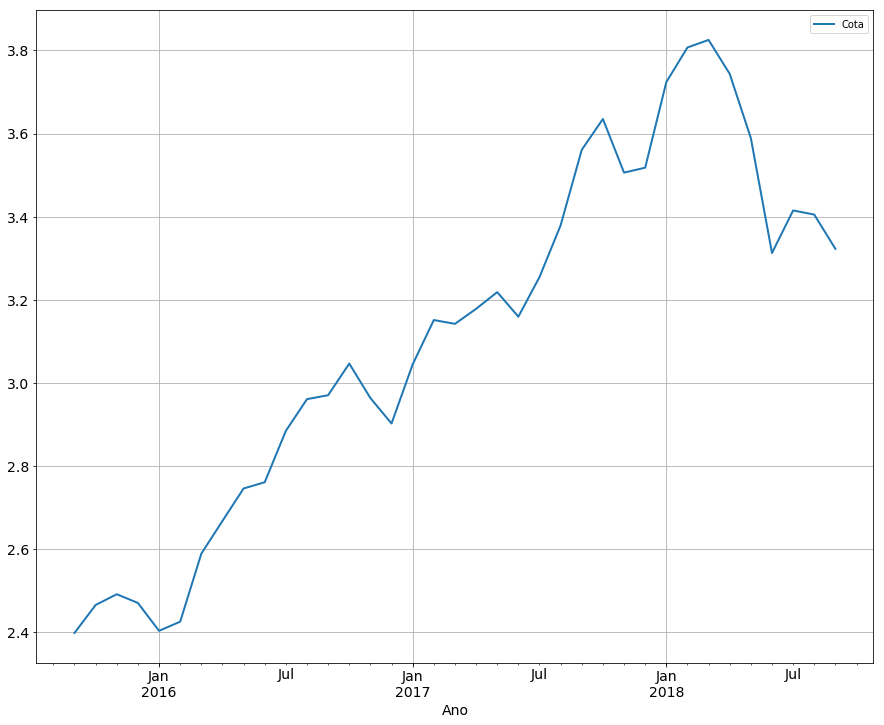

In [17]:
timeseries.plot_timeserie(df_monthly)

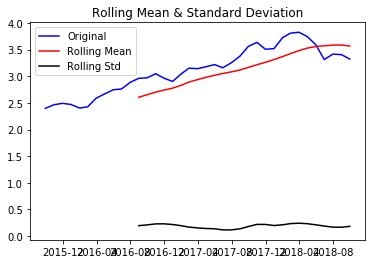

Results of Dickey-Fuller Test:
[FALHA] Test Statistic (-1.536601) > Critical Value 1 (-3.632743)
[FALHA] Test Statistic (-1.536601) > Critical Value 5 (-2.948510)
[FALHA] Test Statistic (-1.536601) > Critical Value 10 (-2.613017)
[FALHA] p-value (0.515334) > 0.05


In [18]:
timeseries.check_stationarity(df_monthly, window=12)

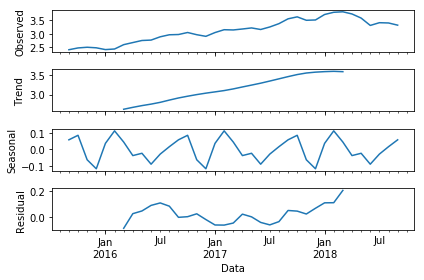

In [19]:
result = seasonal_decompose(df_monthly, model='additive')
result.plot()
plt.show()